# ДЗ 1. Иерархический кластерный анализ

Данные описывают экономические условия в 48 городах мира в 1991 году.
Данные были собраны отделом экономических исследований банка Union
(Швейцария). Описаны экономические условия в 48 городах мира в 1991 году.  
Число наблюдений: 48
Названия переменных:  
City (Город): Название города  
Работа (Work): Взвешенное среднее числа рабочих часов, сосчитанное по 12 профессиям     
Цена (Price): Индекс цен 112 товаров и услуг, включая арендную плату за жилье(значение для Цюриха взято за 100%)    
Заработная плата (Salary): Индекс заработной платы за час работы, сосчитанный по 12 профессиям после налогов и вычетов (значение для Цюриха
взято за 100%)

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
df = pd.read_csv("Econom_Cities_data.csv", sep=";", index_col='City')
df.head(10)

,Work,Price,Salary
City,,,
Amsterdam,1714,"65,6",49
Athens,1792,"53,8","30,4"
Bogota,2152,"37,9","11,5"
Bombay,2052,"30,3","5,3"
Brussels,1708,"73,8","50,5"
Buenos_Aires,1971,"56,1","12,5"
Cairo,-9999,"37,1",-9999
Caracas,2041,61,"10,9"
Chicago,1924,"73,9","61,9"


### Предобработка данных

Необходимо заменить запятые на точки для численных операций. 

In [131]:
df['Price'] = df['Price'].str.replace(',', '.').astype(float)
df['Salary'] = df['Salary'].str.replace(',', '.').astype(float)
df.head(50)


,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5
Buenos_Aires,1971,56.1,12.5
Cairo,-9999,37.1,-9999.0
Caracas,2041,61.0,10.9
Chicago,1924,73.9,61.9


В данной задаче необходима стандартизация, т.к. у признаков разные еденицы измерения.   
Приведем рабочие часы к относительному индексу (значение для Цюриха
взято за 100%)

In [ ]:
df['Work'] = round(df['Work']/df.loc['Zurich', 'Work'] * 100, 1)
df.tail()

,Work,Price,Salary
City,,,
Tel_Aviv,107.9,67.3,27.0
Tokyo,100.6,115.0,68.0
Toronto,101.1,70.2,58.2
Vienna,95.3,78.0,51.3
Zurich,100.0,100.0,100.0


Города 'Cairo' и 'Jakarta' имеют некорректные значения. Их восстановление невозможно, поэтому удаляем соответствующие строки. 

In [133]:
df = df.drop(['Cairo', 'Jakarta'])

### Определение кол-ва кластеров

In [ ]:
#  Активируем 3 процедуры иерархического кластерного анализа
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster    # для построения дендрограмм, 
                                                                     # для кластерного анализа, 
                                                                     # для распределения объектов по найденным кластерам (дополнительная колонка с принадлежностью) 

Для проведения иерархического кластерного анализа  <br>
используем команду linkage из библиотеки scipy. 

Три аргумента этой команды: <br>
таблица данных,  <br>
способ вычисления расстояний между кластерами (```ward```, ```single```(default), ```complete```, ```average```, ```weighted```, ```centroid```, ```median```, ```weighted```)  <br>
и способ вычисления расстояний между объектами (```euclidean``` (default), ```cityblock```, ```hamming```, ```cosine```).   <br>


In [135]:
#  Кластеризуем
link = linkage(df, 'ward', 'euclidean')

В объекте ```link```  хранится история объединения кластеров. Это матрица numpy ```(n-1) x 4```, где ```n``` -- число наблюдений. Каждая строка матрицы описывает слияние очередной пары кластеров с номерами ```link[i, 0]``` и ```link[i, 1]```. Новому кластеру присваивается номер ```n + i```. Столбец ```link[i, 2]``` содержит расстояние между объединяемыми кластерами, а ```link[i, 3]``` -- объем нового кластера.

Строим дендрограммы для определения кол-ва кластеров. 

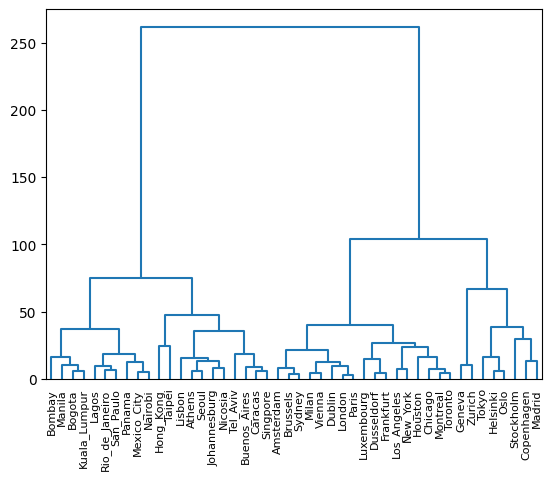

In [136]:
dn = dendrogram(link, color_threshold = -1, labels=df.index.tolist())


Из дендрограммы логично остановиться на 6 или 4. Лучше 4 кластера, чтобы не было совсем маленьких кластеров (из 2-ух городов)

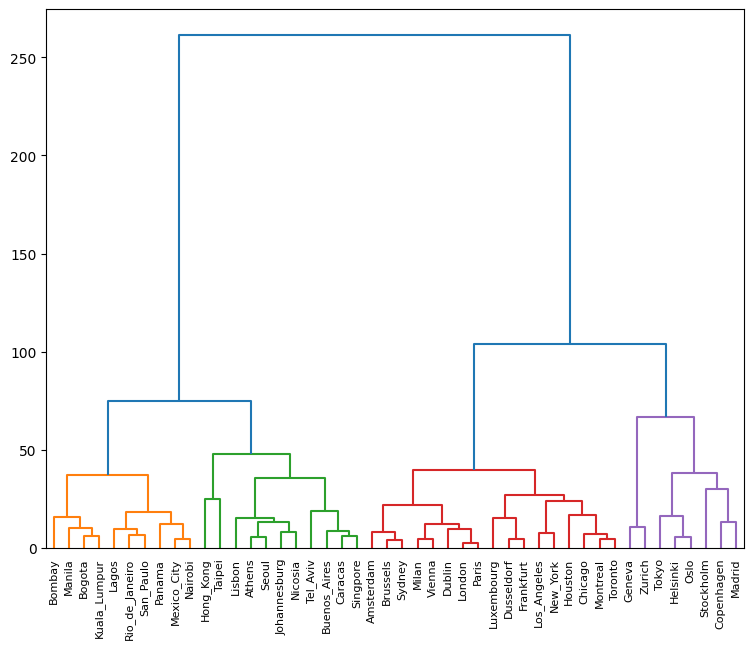

In [137]:
fig = plt.figure(figsize=(9,7))
dn = dendrogram(link, color_threshold = 70, labels=df.index.tolist())

Также для определения числа кластеров рассмотрим "каменистую осыпь". 

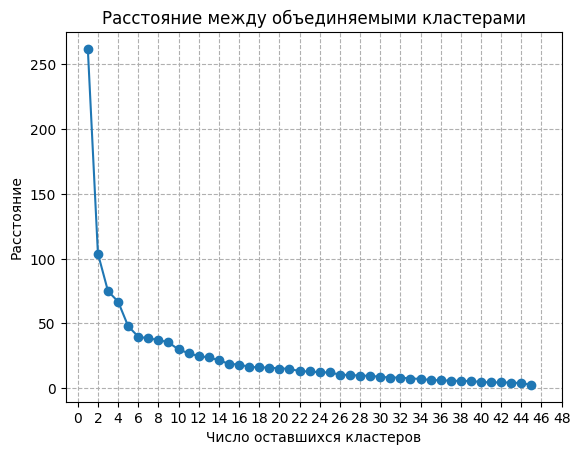

In [147]:
dist = link[:, 2]   # расстояния между объединяемыми кластерами
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Число оставшихся кластеров')
plt.ylabel('Расстояние')
plt.grid(linestyle = '--')
plt.xticks(np.arange(0, 50, 2))
plt.show()

Самый явный перелом - 4 кластера. Поэтому начнем исследование с этого числа. 

### Распределение по кластерам

Добавим к таблице данных df столбец ```cluster```, содержащий код того кластера, в который попал объект. 

In [148]:
# Информация о кластерах добавляется в таблицу данных в виде столбца

# Останавливаем объединение, когда расстояние между кластерами превысит 40
# df['cluster'] = fcluster(link, 40, criterion='distance')

# Останавливаем объединение, когда останется 4 кластера
df['cluster'] = fcluster(link, 4, criterion='maxclust')

df.head(10)

,Work,Price,Salary,cluster
City,,,,
Amsterdam,91.8,65.6,49.0,3
Athens,95.9,53.8,30.4,2
Bogota,115.2,37.9,11.5,1
Bombay,109.9,30.3,5.3,1
Brussels,91.4,73.8,50.5,3
Buenos_Aires,105.5,56.1,12.5,2
Caracas,109.3,61.0,10.9,2
Chicago,103.0,73.9,61.9,3
Copenhagen,91.9,91.3,62.9,4


### Интерпретация

Сравним типичные объекты в разных кластерах.
Посмотрим, по каким переменным различаются кластеры.

Для этого сгруппируем данные по номеру кластера, а затем в каждой группе вычислим средние значения каждой характеристики.  

In [140]:
df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
1,107.120000,43.610000,8.030000
2,105.772727,60.381818,23.909091
3,96.429412,75.758824,55.005882
4,94.387500,104.550000,67.587500


Получили следующие группы:   
1 - Города с низким уровнем экономического развития - низкие зарплаты и низкие цены, самый долгий рабочий день (Рио-де-Жанейро, Мехико)  
2 - Города с развивающейся экономикой - рабочий день все еще большой, но зарплата уже в разы выше, цены тоже умеренно больше (Сеул, Афины)  
3 - Богатые города - зарплаты в 2 раза больше, чем в предыдущем уровне, цены высокие, рабочий день значительно уменьшился (Париж, Лондон)   
4 - Города-лидеры -  очень высокие цены, самая большая зарплата и самый короткий рабочий день (Токио, Копенгаген). 

### Уточнения

Посчитаем, сколько наблюдений попало в каждый кластер. 


In [141]:
print(df['cluster'].value_counts())

cluster
3    17
2    11
1    10
4     8
Name: count, dtype: int64


Присутствует дисбаланс: в третьем кластере больше всего городов. Но мы рассматриваем мировые столицы, поэтому логично, что их значительная часть будет относится к богатым городам.   
Однако на всякий случий попробуем увеличить число кластеров. 

In [142]:
df['cluster'] = fcluster(link, 5, criterion='maxclust')
df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
1,107.120000,43.610000,8.030000
2,105.772727,60.381818,23.909091
3,96.429412,75.758824,55.005882
4,100.300000,97.950000,95.150000
5,92.416667,106.750000,58.400000


In [143]:
print(df['cluster'].value_counts())

cluster
3    17
2    11
1    10
5     6
4     2
Name: count, dtype: int64


При рассмотрении 5 кластеров было выявлено дополнительное разделение богатых городов.  
4 - высокие доходы и высокая производительность достигаются ценой длинного рабочего дня (Токио, Копенгаген)   
5 - высокие цены и социальные гарантии (короткий рабочий день), но чистые доходы после налогов ниже (Женева, Цюрих)   

Такое разделение более правдоподобно с точки зрения экономики, но большой кластер на 17 городов все еще не разбит, для этого нужно 7 кластеров. 

In [144]:
df['cluster'] = fcluster(link, 7, criterion='maxclust')
df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
1,107.120000,43.610000,8.0300
2,120.950000,74.050000,31.1500
3,102.400000,57.344444,22.3000
4,92.912500,76.500000,48.7125
5,99.555556,75.100000,60.6000
6,100.300000,97.950000,95.1500
7,92.416667,106.750000,58.4000


In [145]:
print(df['cluster'].value_counts())

cluster
1    10
3     9
5     9
4     8
7     6
6     2
2     2
Name: count, dtype: int64


В целом, такое разбиение имеет место быть, все группы в чем-то отличаются друг от друга и выделены экстремальные случаи. Но, кажется, что данное разбиение уже слишком мелкое, лучше остановиться на чем-то более общем. 

### Итог

1 - Города с низким уровнем экономического развития - низкие зарплаты и низкие цены, самый долгий рабочий день (Рио-де-Жанейро, Мехико)  
2 - Города с развивающейся экономикой - рабочий день все еще большой, но зарплата уже в разы выше, цены тоже умеренно больше (Сеул, Афины)  
3 - Богатые города - зарплаты в 2 раза больше, чем в предыдущем уровне, цены высокие, рабочий день значительно уменьшился (Париж, Лондон)   
4 - Деловые центры - высокие доходы и высокая производительность достигаются ценой длинного рабочего дня (Токио, Копенгаген)   
5 - Города с социальной ориентацией - высокие цены и социальные гарантии (короткий рабочий день), но чистые доходы после налогов ниже (Женева, Цюрих)  

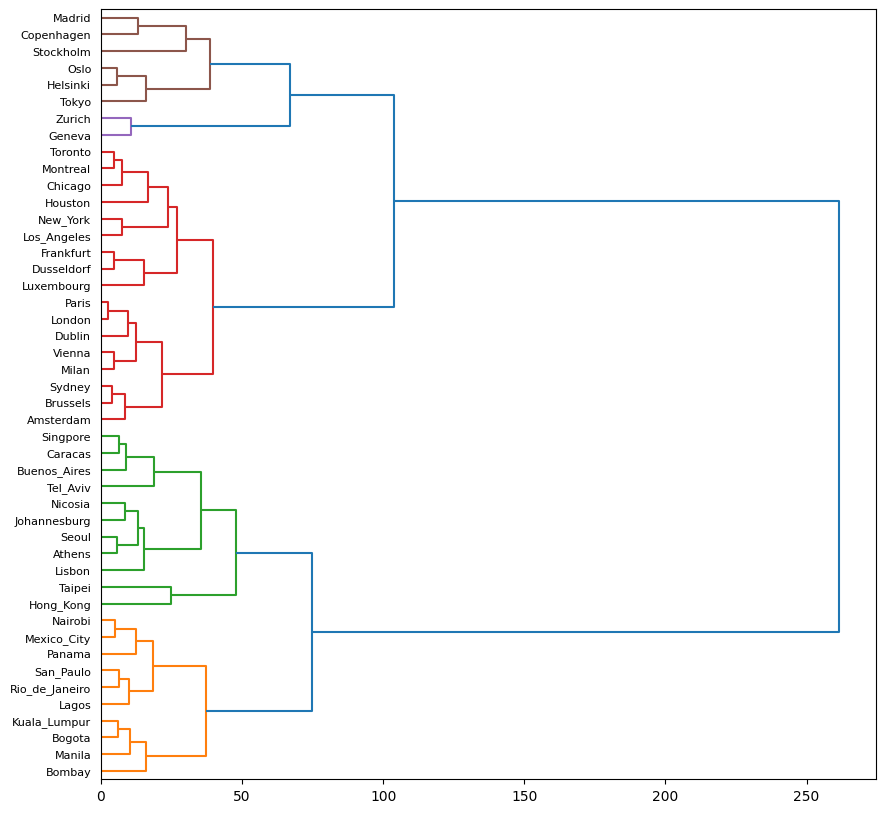

In [149]:
fig = plt.figure(figsize=(10,10))
dn = dendrogram(link, color_threshold = 50, labels=df.index.tolist(), orientation = "right")